In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

%matplotlib inline

## data load

In [2]:
from tensorflow.keras import datasets

fashion_mnist = datasets.fashion_mnist

(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

In [3]:
train_x.shape, train_y.shape

((60000, 28, 28), (60000,))

In [4]:
test_x.shape, test_y.shape

((10000, 28, 28), (10000,))

## data scailing

In [5]:
np.min(train_x), np.max(train_x)

(0, 255)

In [6]:
train_x = train_x/255.
test_x = test_x/255.

In [7]:
np.min(train_x), np.max(train_x)

(0.0, 1.0)

In [33]:
train_x = train_x[..., tf.newaxis]
test_x = test_x[..., tf.newaxis]

In [34]:
train_x.shape, test_x.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

## data check

In [12]:
train_y

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [13]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

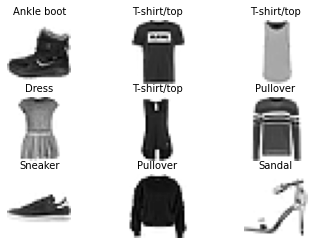

In [30]:
plt.plot(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(train_x[i], cmap="binary")
    plt.axis('off')
    plt.title(class_names[train_y[i]], fontsize = 10)
plt.show()

## build model

In [32]:
from tensorflow.keras import layers

In [35]:
input_shape = (28, 28, 1)
num_classes = 10

learning_rate = 0.001

In [37]:
inputs = layers.Input(input_shape)

#첫번째 convolution block
net = layers.Conv2D(32, (3, 3), padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.25)(net)

#두번째 convolution block
net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.25)(net)

# Fully connected
net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.5)(net)
net = layers.Dense(num_classes)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name='Basic_CNN')

In [38]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## train

In [39]:
num_epochs = 1
batch_size = 64

hist = model.fit(train_x, train_y, 
                 batch_size=batch_size, 
                 shuffle=True)

Train on 60000 samples
60000/60000 [==============================] - 85s 1ms/sample - loss: 0.4574 - accuracy: 0.8333


In [40]:
hist.history

{'loss': [0.4573887037595113], 'accuracy': [0.8332833]}

In [41]:
model.evaluate(test_x, test_y, batch_size=batch_size)

10000/10000 [==============================] - 2s 241us/sample - loss: 0.3101 - accuracy: 0.8840


[0.3101137865781784, 0.884]

## test

In [42]:
test_image = test_x[0, :, :, 0]
test_image.shape

(28, 28)

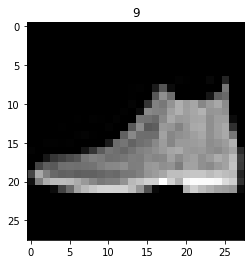

In [43]:
plt.title(test_y[0])
plt.imshow(test_image, 'gray')
plt.show()

In [44]:
test_image.shape

(28, 28)

In [45]:
pred = model.predict(test_image.reshape(1, 28, 28, 1))

In [46]:
pred.shape

(1, 10)

In [47]:
pred

array([[2.6105797e-06, 1.0058291e-06, 1.1524016e-06, 2.4544343e-06,
        2.4511080e-06, 1.8778393e-03, 2.2681804e-06, 4.8542982e-03,
        8.1933476e-06, 9.9324775e-01]], dtype=float32)

In [49]:
class_names[np.argmax(pred)]

'Ankle boot'

## evaluate

In [59]:
model.evaluate(test_x, test_y)

10000/10000 [==============================] - 3s 263us/sample - loss: 0.3101 - accuracy: 0.8840


[0.31011378828287123, 0.884]

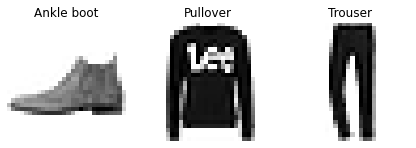

In [67]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(test_x[:3]):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[test_y[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()